In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from math import floor

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('learningSet.csv')

In [4]:
dfnan = df.select_dtypes('number').isna().sum()
NaN_columns = dfnan[dfnan>0].index
NaN_columns

Index(['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS',
       'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN',
       'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2',
       'MSA', 'ADI', 'DMA', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6',
       'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12',
       'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18',
       'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24',
       'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8',
       'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14',
       'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20',
       'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4',
       'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10',
       'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16',
    

In [5]:
to_clean = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']

In [6]:
pd.DataFrame(
    df[to_clean].isna().sum(), columns=['NaN_count']
).join(
    pd.DataFrame(round(df[to_clean].isna().sum()*100/len(df),2), columns=['%']))

,NaN_count,%
GEOCODE2,132,0.14
WEALTH1,44732,46.88
ADI,132,0.14
DMA,132,0.14
MSA,132,0.14


In [7]:
df[['WEALTH1','WEALTH2']].notna()

,WEALTH1,WEALTH2
0,False,True
1,True,True
2,True,True
3,True,True
4,True,False
...,...,...
95407,False,False
95408,True,False
95409,False,False
95410,False,True


If we could somehow combine the information of 'WEALTH1' and 'WEALTH2' and remove rows without wealth data, 
 how much would be lost?

In [8]:
mask = df['WEALTH1'].notna()+df['WEALTH2'].notna() # vector signaling at least 1 wealth metric

print(len(df)-sum(mask), 'lost rows out of', len(df))
print('data loss =', 100-round(sum(mask)*100/len(df),2),'%')

21843 lost rows out of 95412
data loss = 22.89 %


How many times both 'WEALTH1' and 'WEALTH2' metrics actually coincide?


In [9]:
hard_mask = df['WEALTH1'].notna()*df['WEALTH2'].notna() # vector signaling 2 wealth metrics

print('Coincidence between WEALTH1 and WEALTH2 =', 
      round(sum(df['WEALTH1'][hard_mask]==df['WEALTH2'][hard_mask])*100/sum(hard_mask),2), '%')

Coincidence between WEALTH1 and WEALTH2 = 64.83 %


 Are there clear collinearities between 'WEALTH1','WEALTH2' and maybe other wealth proxies?

In [10]:
corr_mat = df[['WEALTH1','WEALTH2','INCOME']].corr(method='spearman')
corr_mat

,WEALTH1,WEALTH2,INCOME
WEALTH1,1.000000,0.872854,0.462701
WEALTH2,0.872854,1.000000,0.409420
INCOME,0.462701,0.409420,1.000000


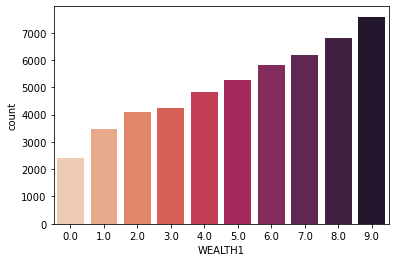

In [11]:
sns.countplot(x=df['WEALTH1'] , palette='rocket_r')
plt.show()

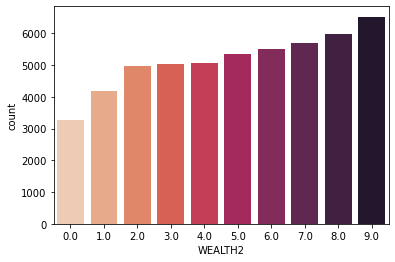

In [12]:
sns.countplot(x=df['WEALTH2'] , palette='rocket_r' )
plt.show()

OPTION A: Get the mean of both wealth metrics and drop NaN, assuming a data loss of 22.89% (21843 rows).

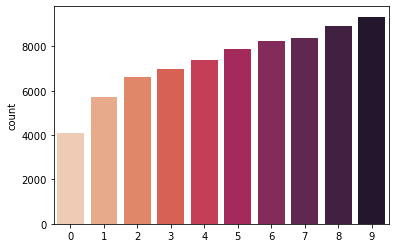

In [13]:
sns.countplot(x=df[['WEALTH1','WEALTH2']].mean(axis=1).dropna().apply(lambda avg: floor(avg)), palette='rocket_r' )
plt.show()

OPTION B: Fill NaN with a median value

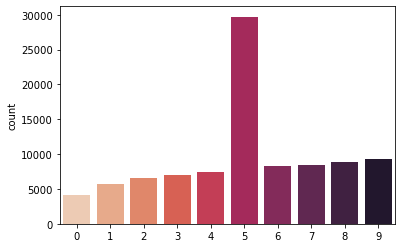

In [14]:
sns.countplot(x=df[['WEALTH1','WEALTH2']].mean(axis=1).fillna(
    floor(df[['WEALTH1','WEALTH2']].mean().mean() # Fill NaN with average wealth
         )).apply(lambda avg: floor(avg)),palette='rocket_r' )
plt.show()

No data loss